In [1]:
import pandas as pd
import numpy as np
import math as m

from random import seed
from random import random as rand
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
class IsingModel :
    def __init__ (self, size, J=1.0, T=2.0) :
        self.seed = seed
        self.size = size
        self.lattice = np.full((self.size, self.size), -1)
        self.J = J
        self.T = T
        
    def PickSite(self) :
        x_index = np.random.randint(1, self.size-1)
        y_index = np.random.randint(1, self.size-1)
        site_pair = (x_index, y_index)
        return site_pair

    def Infect(self, coordinates) :
        self.lattice[coordinates] = 1
        return self.lattice
    
    def CalcEnergy(self) :
        lat = self.lattice
        size = self.size
        J = self.J
        interacting_neighbors_lattice = np.zeros(shape=(size,size))
        for a in range(0, size) :
            for b in range(0, size) :
                i = a%(size-1)
                j = b%(size-1)
                interacting_neighbors_lattice[a, b] = -J*lat[a, b]*(lat[i, j-1] + lat[i, j+1] + lat[i-1, j] + lat[i+1, j])
        return interacting_neighbors_lattice.sum()
    
    def TallySI(self) :
        (val, count) = np.unique(self.lattice, return_counts=True)
        f = np.asarray((val, count)).T
        return (f[0][1], f[1][1])
    
    def PvRN(self, h_0, h) :
        seed(self.seed)
        p = m.exp((h_0 - h)/self.T)
        if rand() <= p :
            return True
        else :
            return False
            
        

In [35]:
arr = IsingModel(100)
seed(42)
results = pd.DataFrame(columns=['S', 'I', 'h_0', 'h'])
results

for i in range(0, 10000) :
    h_0 = arr.CalcEnergy()
    site = arr.PickSite()
    if arr.lattice[site] == -1 :
        arr.Infect(site)
        h = arr.CalcEnergy()
        if h > h_0 :
            if not arr.PvRN(h_0, h):
                arr.lattice[site] == -1
    if i%500 == 0 :
        tally = arr.TallySI()
        dictoappend = {'S': tally[0], 'I' : tally[1], 'h_0' : h_0, 'h': h}
        results = results.append(dictoappend, ignore_index=True)
        

KeyboardInterrupt: 

In [36]:
results

,S,I,h_0,h
0,9999.0,1.0,-40000.0,-39984.0
1,9515.0,485.0,-32652.0,-32642.0
2,9050.0,950.0,-26276.0,-26260.0
3,8605.0,1395.0,-20800.0,-20792.0
4,8180.0,1820.0,-16296.0,-16288.0
5,7792.0,2208.0,-12744.0,-12736.0
6,7417.0,2583.0,-9794.0,-9794.0
7,7054.0,2946.0,-7252.0,-7236.0


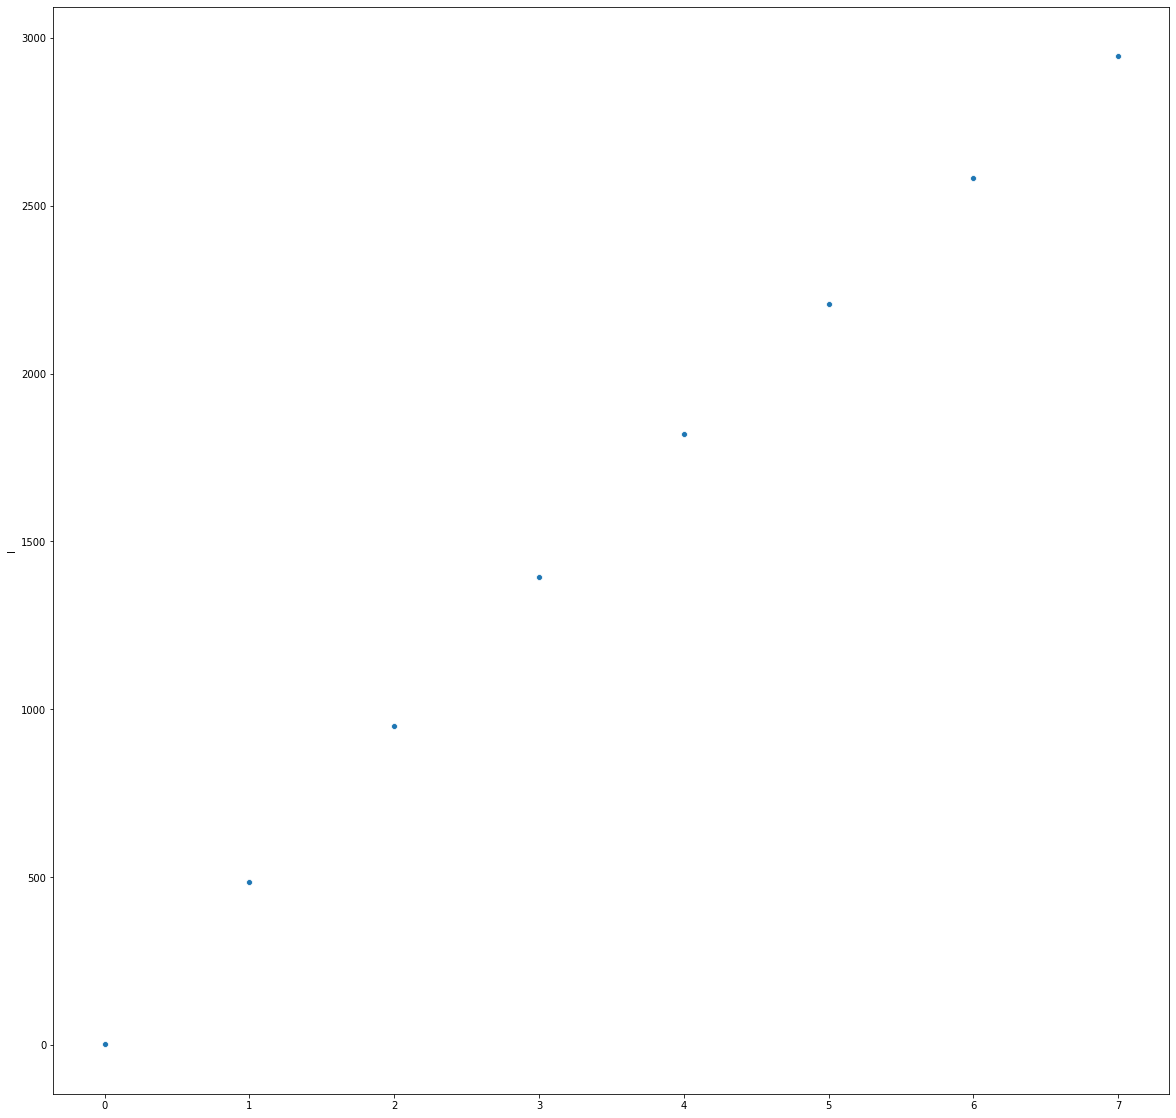

In [37]:
plt.figure(figsize=(20,20))
sns.scatterplot(x=results.index, y='I', data=results)